In [1]:
from IPython.display import Image

## Implement a Basic Driving Agent

#### 1. QUESTION: Observe what you see with the agent's behavior as it takes random actions. Does the smartcab eventually make it to the destination? Are there any other interesting observations to note?

Making the smartcab take random actions means that the smartcab is just driving around the city with no particular purpose. It eventually reaches its destination when the deadline is not enforced, but it's very frustrating to see that sometimes it's very close to reaching its destination and just begins to drive away from it. The cab pays no attention to the rewards as it does not care about reaching the destination on time or avoiding infractions.

## Inform the Driving Agent

#### 2. QUESTION: What states have you identified that are appropriate for modeling the smartcab and environment? Why do you believe each of these states to be appropriate for this problem?

- **Traffic light color**. This state is important because the cab needs to know if it has to stop at an intersection or if it can continue driving.
- **Cars around us and their directions**. This is important in order to understand if we can move forward, turn left on a green light, or turn right on a red light, according to U.S. Right-of-Way rules. The information about oncoming traffic is only relevant if we know our planned direction, which takes us to the next point.
- **Next waypoint**. It is important to know the "recommended" or "planned" direction to have a sense of the direction in which we should be moving. We might want to follow this recommendation or not based on other inputs, but knowing this is helpful to eventually reach our destination.  
- **Deadline**. This is important to know since we know the cab won't receive any reward if it does not reach its destination on time. It is important to notice that the deadline is expressed as the number of additional steps we can take before we run out of time. If the deadline is, say 50, this means that if this input is not reduced, we could end up having up to 50 additional states for each combination of inputs described above (see next section). Therefore, I chose to define a new variable to determine if we should "hurry up" (meaning that we have less than 20 steps) or maybe we can explore a little bit more.

All these inputs will help us identify the state the smartcab is in. In this particular case the state would have the format: *{light}-{oncoming}-{right}-{left}-{hurry_up}-{next_waypoint}*, resulting in something that looks like this:
**green-None-None-None-yes-forward**

#### 2.1 OPTIONAL: How many states in total exist for the smartcab in this environment? Does this number seem reasonable given that the goal of Q-Learning is to learn and make informed decisions about each state? Why or why not?

There exist a total 2 x 4 x 4 x 4 x 2 x 4 = 1024 states in this environment:
- Lights = 2
- Oncoming = 4
- Right = 4
- Left = 4
- Hurry Up = 2
- Next Waypoint = 4

Combining these inputs into a single string, we get inputs like 'green-None-None-None-yes-forward', which can later be used to take actions.

1024 states are a reasonable number of states for this problem since the smartcab will make around 100 trips in 1 round, and can take around 30-40 steps in each trip. This means that the cab will be making about 3000-4000 steps in total, enabling the smartcab to visit the most common states more than once, and learn during the whole process. If we were to add the raw deadline as part of the state then the problem would be more difficult, since we would have around 512 * 40 = 20,480 different states, making it very unlikely for the car to be in the same state two times, and thus learn.

## Implement a Q-Learning Driving Agent

#### 3. QUESTION: What changes do you notice in the agent's behavior when compared to the basic driving agent when random actions were always taken? Why is this behavior occurring?

Now the car has an objective, or at least knows the policy that will get it closer to that objective (maximizing rewards). By following the actions that maximize the rewards, the car tries to reach its destination, as opposed to taking random actions.

This behavior is occurring precisely because the smartcab is trying to maximize its rewards, and now it has memory of the reward it has obtained in previous steps, as well as the future reward that making an action will give it.

## Improve the Q-Learning Driving Agent

#### 4. QUESTION: Report the different values for the parameters tuned in your basic implementation of Q-Learning. For which set of parameters does the agent perform best? How well does the final driving agent perform?

The agent performs best when the immediate reward has a higher weight than the future reward. In a sense this is an expected behavior, since the cab only has the input of the environment at a particular moment (before it acts), but the environment might have changed when it reaches the next state. In other words, the environment is dynamic. For example, the cab *knows* that if it makes a right turn now, the light at the next intersection is currently green. But the reality is that when the cab reaches that intersection, it might have changed to red. Knowing this in the previous step might have motivated the cab to take some other action. 

The agent also performs best when it follows what it learns (exploiting), rather than exploring new actions. This is also expected since once the cab knows that if it speeds ahead on a red light it will get penalized, taking this same action in another part of the map or at a later point in tame will not change the outcome. 

Below I summarize a set of parameters that I tested and the cumulative rewards after the 100 trips. In each case, I ran the simulation 3 times and averaged out the results in order to get a better idea of the potential reward. For example, in case A (Gamma=0.15, Epsilon=0.10) the cumulative rewards of the 3 rounds were 2493, 2473, and 2624. The average is 2530, which is the number included in the table.


| Scenario | Gamma | Epsilon | Cumulative Reward (avg 3 trips)|
| --- | --- | --- |  --- | --- |
| A | 0.15 | 0.10 | 2530 |
| B | 0.15 | 0.30 | 1980 |
| C | 0.15 | 0.50 | 1241 |
| D | 0.45 | 0.10 | 1758 |
| E | 0.75 | 0.10 |  687 |




As seen in the image below, all the different scenarios start with the same cumulative rewards (except the yellow line, which is taking mostly random actions), but only the orange line is the one that is exploiting the information enough to get the best results. 

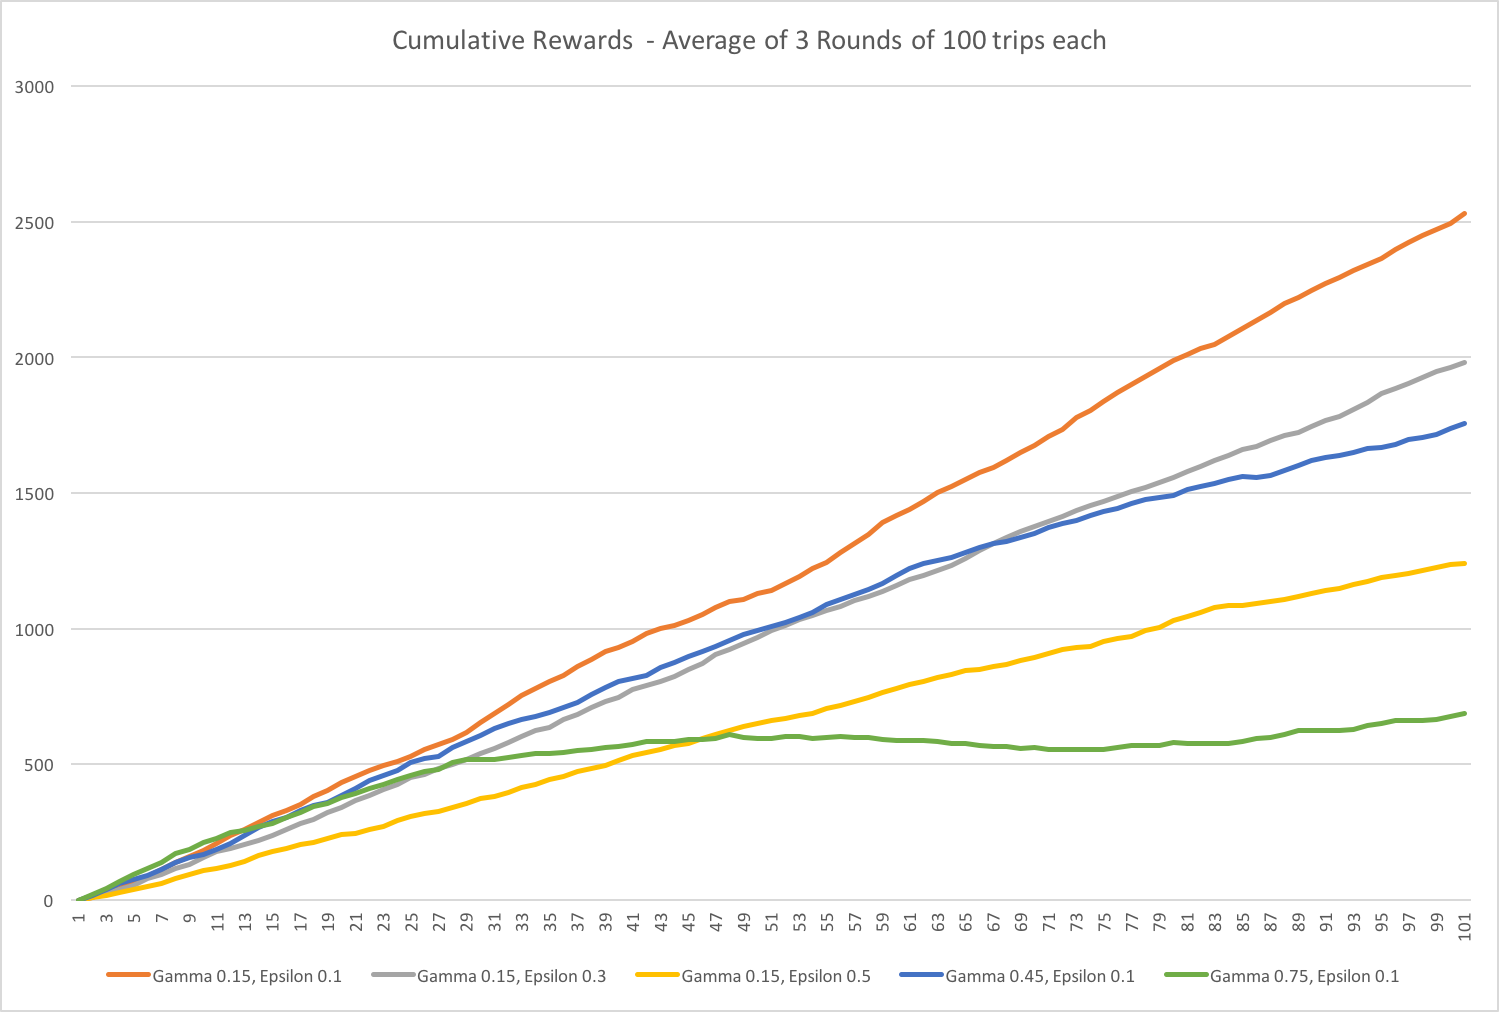

In [2]:
Image('cumulative_rewards.png')

A way to understand why the orange like grows faster than the others is by understanding the individual rewards the cab gets on each trip. As we can see in the table below, we see that as the time progresses and the cab makes more and more trips, the rewards are getting slightly higher.

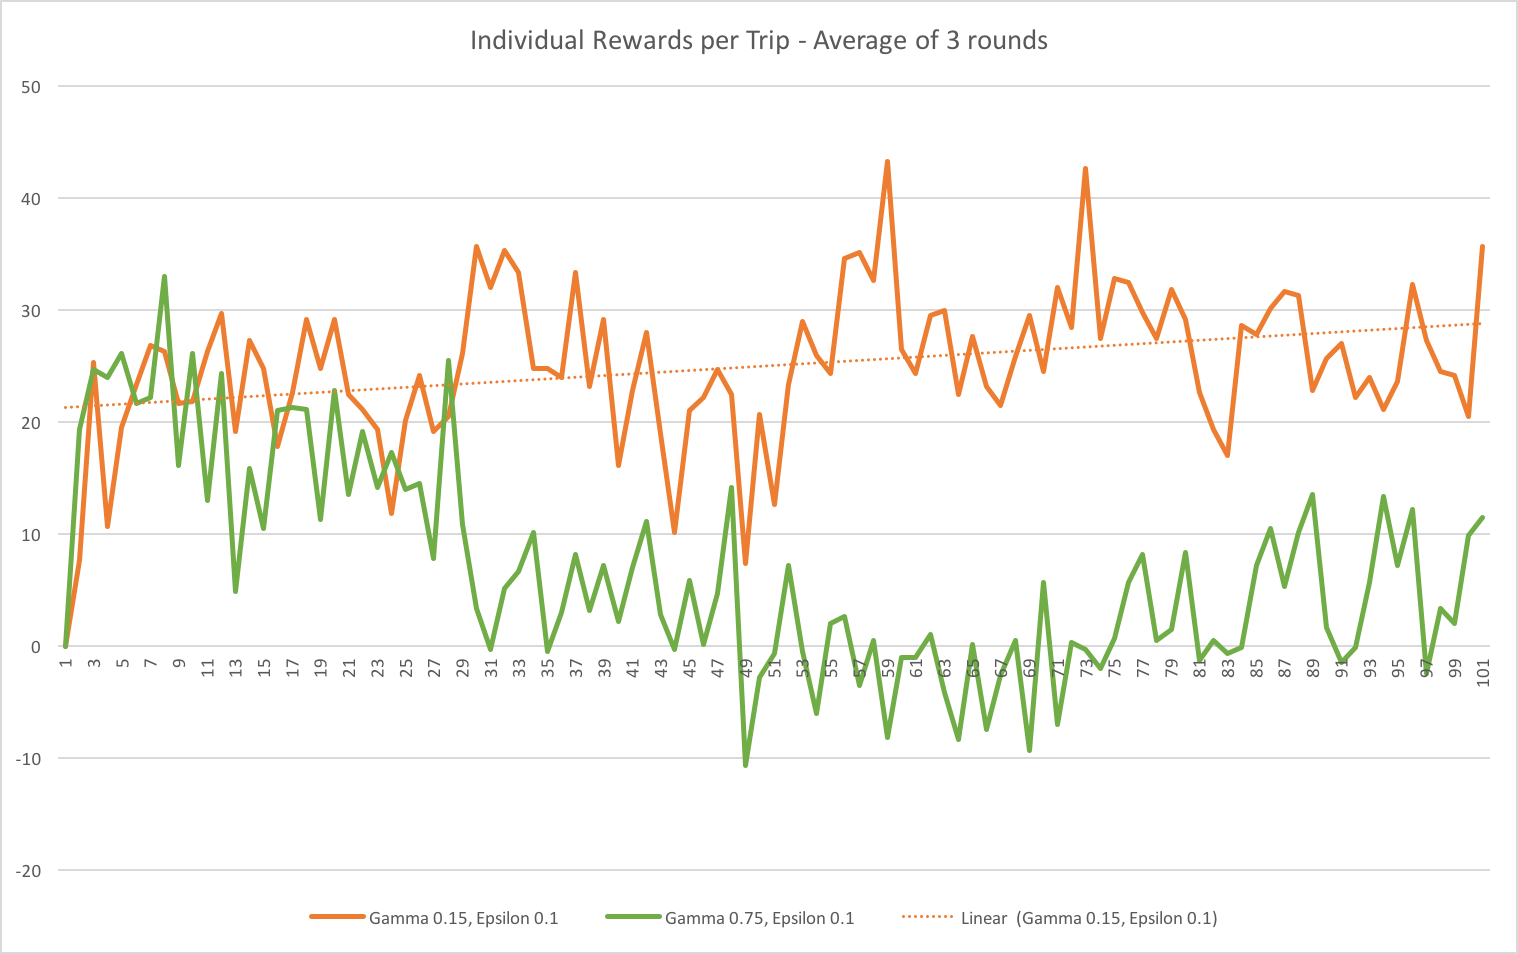

In [8]:
Image('individual_rewards.png')

#### 5. QUESTION: Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties? How would you describe an optimal policy for this problem?

Yes, the cab is motivated to reach the destination by maximizing the rewards, and as the time progresses the chance it incurrs in penalties is lower and lower. I would describe the policy of the agent as: follow the waypoint as best as possible, but wait when you have to wait (example: red lights).